In [1]:
#Simply select "GPU" in the Accelerator drop-down in Notebook Settings (either through the Edit menu or the command palette at cmd/ctrl-shift-P).

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
#Getting and unzipping data

!wget https://raw.githubusercontent.com/samgottuso/first_attempt_machine_learning_predicting_upsets/master/EPL_upsets.zip -c

!mkdir EPL_data

!unzip EPL_upsets.zip -d EPL_data/

--2018-02-28 01:22:22--  https://raw.githubusercontent.com/samgottuso/first_attempt_machine_learning_predicting_upsets/master/EPL_upsets.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

mkdir: cannot create directory ‘EPL_data’: File exists
Archive:  EPL_upsets.zip
replace EPL_data/epl_2000.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [4]:
#Some of these won't play nicely with others

!wget https://raw.githubusercontent.com/samgottuso/first_attempt_machine_learning_predicting_upsets/master/epl_2000.csv
!wget https://raw.githubusercontent.com/samgottuso/first_attempt_machine_learning_predicting_upsets/master/epl_2001.csv
!wget https://raw.githubusercontent.com/samgottuso/first_attempt_machine_learning_predicting_upsets/master/epl_2002.csv

--2018-02-28 01:22:40--  https://raw.githubusercontent.com/samgottuso/first_attempt_machine_learning_predicting_upsets/master/epl_2000.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62148 (61K) [text/plain]
Saving to: ‘epl_2000.csv’

epl_2000.csv        100%[===================>]  60.69K  --.-KB/s    in 0.03s   

2018-02-28 01:22:40 (2.17 MB/s) - ‘epl_2000.csv’ saved [62148/62148]

--2018-02-28 01:22:40--  https://raw.githubusercontent.com/samgottuso/first_attempt_machine_learning_predicting_upsets/master/epl_2001.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, await

In [5]:
# Downloading and intstalling keras
!pip install keras

    100% |████████████████████████████████| 327kB 2.3MB/s 


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

S_0=pd.read_csv('epl_2000.csv', error_bad_lines=False)
S_1=pd.read_csv('epl_2001.csv',error_bad_lines=False)
S_2=pd.read_csv('epl_2002.csv',error_bad_lines=False)
S_3=pd.read_csv('EPL_data/epl_2003.csv', error_bad_lines=False)
S_4=pd.read_csv('EPL_data/epl_2004.csv', error_bad_lines=False)
S_5=pd.read_csv('EPL_data/epl_2005.csv', error_bad_lines=False)
S_6=pd.read_csv('EPL_data/epl_2006.csv', error_bad_lines=False)
S_7=pd.read_csv('EPL_data/epl_2007.csv', error_bad_lines=False)
S_8=pd.read_csv('EPL_data/epl_2008.csv', error_bad_lines=False)
S_9=pd.read_csv('EPL_data/epl_2009.csv', error_bad_lines=False)
S_10=pd.read_csv('EPL_data/epl_2010.csv', error_bad_lines=False)
S_11=pd.read_csv('EPL_data/epl_2011.csv', error_bad_lines=False)
S_12=pd.read_csv('EPL_data/epl_2012.csv', error_bad_lines=False)
S_13=pd.read_csv('EPL_data/epl_2013.csv', error_bad_lines=False)
S_14=pd.read_csv('EPL_data/epl_2014.csv', error_bad_lines=False)
S_15=pd.read_csv('EPL_data/epl_2015.csv', error_bad_lines=False)
S_16=pd .read_csv('EPL_data/epl_2016.csv', error_bad_lines=False)
S_17=pd.read_csv('EPL_data/epl_2017.csv', error_bad_lines=False)

b'Skipping line 257: expected 48 fields, saw 49\nSkipping line 258: expected 48 fields, saw 49\nSkipping line 259: expected 48 fields, saw 49\nSkipping line 260: expected 48 fields, saw 49\nSkipping line 261: expected 48 fields, saw 49\nSkipping line 262: expected 48 fields, saw 49\nSkipping line 263: expected 48 fields, saw 49\nSkipping line 264: expected 48 fields, saw 49\nSkipping line 265: expected 48 fields, saw 49\nSkipping line 266: expected 48 fields, saw 49\nSkipping line 267: expected 48 fields, saw 49\nSkipping line 268: expected 48 fields, saw 49\nSkipping line 269: expected 48 fields, saw 49\nSkipping line 270: expected 48 fields, saw 49\nSkipping line 271: expected 48 fields, saw 49\nSkipping line 272: expected 48 fields, saw 49\nSkipping line 273: expected 48 fields, saw 51\nSkipping line 274: expected 48 fields, saw 51\nSkipping line 275: expected 48 fields, saw 51\nSkipping line 276: expected 48 fields, saw 51\nSkipping line 277: expected 48 fields, saw 51\nSkipping li

In [7]:
#This allows us to merge the data together into 1 data source-- see that we are working with 6687 games (Bigger data set than the last time I ran through this)

data_names=[S_0,S_1,S_2,S_3,S_4,S_5,S_6,S_7,S_8,S_9,S_10,S_11,S_12,S_13,S_14,S_15,S_16,S_17]

merged_data=pd.concat(data_names,ignore_index=True,join='inner')

merged_data.dtypes




len(merged_data)

6687

In [0]:
#This cell adds what the Sports books picks were and whether or not it was an upset (not the same as what the sport books predicted)

setup_data=merged_data
setup_data['pick']=''
setup_data['upset']=int


ft_col=['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HS','AS','HST','AST','HF','AF','HY','AY','pick','upset','WHH','WHD','WHA']
setup_data_ft=setup_data[ft_col]

In [31]:
#We have 115 games that are missing WH data
setup_data_no_NA_ft=setup_data_ft.dropna()

print(len(setup_data_ft)-len(setup_data_no_NA_ft))

#This would get rid of 115 games... is there anyway we can impute missing values?

setup_data_NA=setup_data_ft[setup_data_ft.isnull().any(axis=1)]

setup_data_NA


#Maybe use GBH/GBA/GBD?
row_list=[]
for row in setup_data_NA.index:
  setup_data_ft['WHH'][row]=setup_data['LBH'][row]
  setup_data_ft['WHA'][row]=setup_data['LBA'][row]
  setup_data_ft['WHD'][row]=setup_data['LBD'][row]
 





115


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist

In [0]:


##Initial data cleaning and addition of columns-- this function adds both what William picked for the game (with the lowest odds) and whether the actual result matched that
##Changed from Bet 365 to William Hill to include more data--except for the replaced values in the earlier cell

##New Faster way to assign using df.apply
pick=''
def odds_pick(row):
  home= row['WHH']
  away= row['WHA']
  draw= row['WHD']
  min_odds=min(home,away,draw)
  if min_odds == home:
    pick='H'
  elif min_odds == away:
    pick='A'
  else:
    pick='D'
  return pick

setup_data_ft['pick']=setup_data_ft.apply(odds_pick,axis=1)

def upset_pick(row):
  if row['pick']==row['FTR']:
    upset=1
  else:
    upset=0
  return upset

setup_data_ft['upset']=setup_data_ft.apply(upset_pick,axis=1)


In [69]:
##Testing the value of being at home... if the winning team was at home=2, if home team draw=1 if lost=0

setup_data_ft['home'] = pd.factorize(setup_data_ft['FTR'],sort=['A','D','H'])[0]
#Making sure everything lines up
print(setup_data_ft[['FTR','home']])

     FTR  home
0      H     2
1      H     2
2      A     0
3      D     1
4      H     2
5      D     1
6      H     2
7      H     2
8      H     2
9      H     2
10     H     2
11     H     2
12     D     1
13     D     1
14     H     2
15     H     2
16     H     2
17     A     0
18     A     0
19     H     2
20     D     1
21     D     1
22     H     2
23     A     0
24     A     0
25     H     2
26     D     1
27     D     1
28     D     1
29     A     0
...   ..   ...
6657   H     2
6658   H     2
6659   D     1
6660   H     2
6661   A     0
6662   H     2
6663   A     0
6664   H     2
6665   H     2
6666   A     0
6667   A     0
6668   A     0
6669   H     2
6670   H     2
6671   A     0
6672   H     2
6673   H     2
6674   H     2
6675   D     1
6676   A     0
6677   H     2
6678   A     0
6679   H     2
6680   A     0
6681   D     1
6682   H     2
6683   H     2
6684   A     0
6685   H     2
6686   A     0

[6686 rows x 2 columns]


In [70]:
#Make sure it didn't return any null values and checking object types

print(pd.isnull(setup_data_ft).sum())
print(setup_data_ft.dtypes)

#so just one remaining game that is still null

#Getting rid of the that one row

setup_data_ft=setup_data_ft.dropna()

Date                     0
HomeTeam                 0
AwayTeam                 0
FTHG                     0
FTAG                     0
FTR                      0
HS                       0
AS                       0
HST                      0
AST                      0
HF                       0
AF                       0
HY                       0
AY                       0
pick                     0
upset                    0
WHH                      0
WHD                      0
WHA                      0
home                     0
total_shots              0
total_shots_on_target    0
total_goals              0
total_fouls              0
total_yellow             0
dtype: int64
Date                      object
HomeTeam                  object
AwayTeam                  object
FTHG                     float64
FTAG                     float64
FTR                       object
HS                       float64
AS                       float64
HST                      float64
AST            

In [71]:
##Creating some other fields which will be useful for comparing games to one another
setup_data_ft['total_shots']=setup_data_ft.HS+setup_data_ft.AS
setup_data_ft['total_shots_on_target']=setup_data_ft.HST+setup_data_ft.AST
setup_data_ft['total_goals']=setup_data_ft.FTHG+setup_data_ft.FTAG
setup_data_ft['total_fouls']=setup_data_ft.HF+setup_data_ft.AF
setup_data_ft['total_yellow']=setup_data_ft.HY+setup_data_ft.AY


print(setup_data_ft.dtypes)
#returns some objects that mess things up later so let's change them up


Date                      object
HomeTeam                  object
AwayTeam                  object
FTHG                     float64
FTAG                     float64
FTR                       object
HS                       float64
AS                       float64
HST                      float64
AST                      float64
HF                       float64
AF                       float64
HY                       float64
AY                       float64
pick                      object
upset                      int64
WHH                      float64
WHD                      float64
WHA                      float64
home                       int64
total_shots              float64
total_shots_on_target    float64
total_goals              float64
total_fouls              float64
total_yellow             float64
dtype: object


                          upset      home  total_shots  total_shots_on_target  \
upset                  1.000000  0.397014     0.042765               0.087536   
home                   0.397014  1.000000    -0.003923               0.034540   
total_shots            0.042765 -0.003923     1.000000               0.574333   
total_shots_on_target  0.087536  0.034540     0.574333               1.000000   
total_fouls           -0.097915 -0.012205    -0.176580              -0.056509   
total_yellow          -0.091033 -0.062118    -0.045623              -0.057149   
total_goals            0.210502  0.060498     0.210434               0.340012   

                       total_fouls  total_yellow  total_goals  
upset                    -0.097915     -0.091033     0.210502  
home                     -0.012205     -0.062118     0.060498  
total_shots              -0.176580     -0.045623     0.210434  
total_shots_on_target    -0.056509     -0.057149     0.340012  
total_fouls               1.000

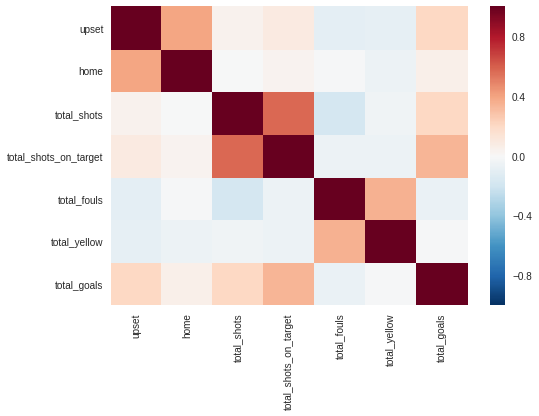

In [72]:
#Figuring out what's related

#Break down our data further so we can do some correlations
numerical_cols=['upset','home','total_shots','total_shots_on_target','total_fouls','total_yellow','total_goals']
numerical_data=setup_data_ft[numerical_cols]

num_cor=numerical_data.corr()

print(num_cor)
print(sns.heatmap(num_cor))

#This info isn't super helpful (since we would assume that shots are correlated with shots on target already) so let's make a pivot table and look at averages by result

AxesSubplot(0.125,0.125;0.62x0.755)


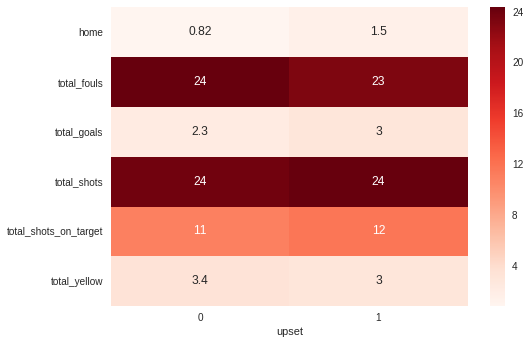

In [73]:
#Making the pivot table

ft_pt=['total_shots','total_shots_on_target','total_fouls','total_yellow','total_goals']

piv=pd.pivot_table(numerical_data,columns=['upset'])

print(sns.heatmap(piv,annot=True,cmap='Reds'))

#looks like upsets are slightly more likely to have more goals, fewer fouls, more shots and to be when the home team is the underdog

In [98]:
#First model-- using logistic regression for classification with all of our factors
from sklearn import linear_model, model_selection
from sklearn.linear_model import LogisticRegression
lr_1=LogisticRegression()

ft_model=['home','total_shots','total_shots_on_target','total_fouls','total_yellow','total_goals']

X_df=setup_data_ft[ft_model]

y_df=setup_data_ft['upset']

X=np.array(setup_data_ft[ft_model])
y=np.array(setup_data_ft['upset'].astype(str))


X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,random_state=8)

log1=linear_model.LogisticRegression(C=1e9).fit(X_train,y_train)


print(log1.score(X_test,y_test))



0.7200956937799043
<bound method BaseEstimator.get_params of LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)>


In [115]:
#How were our factors weighted?

pd.DataFrame(list(zip(X_df.columns, np.transpose(log1.coef_))))

,0,1
0,home,[1.0218116772850139]
1,total_shots,[-0.005818933534533992]
2,total_shots_on_target,[0.0068609995796928384]
3,total_fouls,[-0.029412432262746206]
4,total_yellow,[-0.06809978283914896]
5,total_goals,[0.27589913311166087]


In [94]:
#What if we just look at offensive categories?

lr_O=LogisticRegression()
offense_list=['total_shots','total_goals']
X_O_df=setup_data_ft[offense_list]
y_O_df=setup_data_ft['upset']

X_O=np.array(X_O_df)
y_O=np.array(y_O_df)

X_O_train,X_O_test,y_O_train,y_O_test=model_selection.train_test_split(X_O,y_O,random_state=8)

logO=lr_O.fit(X_O_train,y_O_train)

print(logO.score(X_O_test,y_O_test))


0.6106459330143541


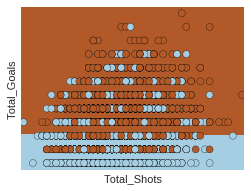

In [104]:
#Color Plot taken from http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
h=.02
x_min, x_max = X_O[:, 0].min() - .5, X_O[:, 0].max() + .5
y_min, y_max = X_O[:, 1].min() - .5, X_O[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logO.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X_O[:, 0], X_O[:, 1], c=y_O, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Total_Shots')
plt.ylabel('Total_Goals')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

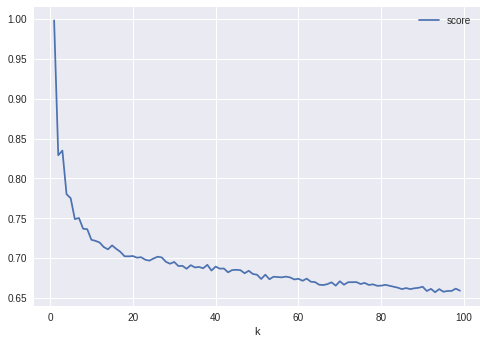

In [121]:
#KNN Model

from sklearn import neighbors

scores = []
for k in range(1,100):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])
    
plot_data = pd.DataFrame(scores,columns=['k','score'])
plot_data.plot.line(x='k',y='score');